In [1]:
# Passo 1: fazendo imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


In [2]:
# Passo 2: Conectando no drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho do arquivo
path = '/content/drive/MyDrive/Trabalho_CD'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Passo 3:  Carregando os 3 datasets

orders = pd.read_csv(path + "/olist_orders_dataset.csv")
order_items = pd.read_csv(path + "/olist_order_items_dataset.csv")
products = pd.read_csv(path + "/olist_products_dataset.csv")

print("Orders:", orders.shape) # .shape usei para ter uma base da mudança antes e depois do merge do tamanho
print("Order Items:", order_items.shape) # do dataframe
print("Products:", products.shape)

Orders: (99441, 8)
Order Items: (112650, 7)
Products: (32951, 9)


In [4]:
#so usando head
print(orders.head)

print(order_items.head)

print(products.head)

<bound method NDFrame.head of                                order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp  

In [7]:
# Passo 4: Fazendo merge dos datasets

# Merge 1: orders + order_items  (chave: order_id)
df = orders.merge(order_items, on="order_id", how="inner")

# Merge 2: adicionando dados de produtos (chave: product_id)
df = df.merge(products, on="product_id", how="left")

print("DataFrame final unificado:", df.shape)
df.head()


DataFrame final unificado: (112650, 22)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [8]:
# Passo 5: mostrando dimensões,
df.shape

df.head()

df.tail()

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Primeiras 5 linhas do dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   customer_id                    112650 non-null  object 
 2   order_status                   112650 non-null  object 
 3   order_purchase_timestamp       112650 non-null  object 
 4   order_approved_at              112635 non-null  object 
 5   order_delivered_carrier_date   111456 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  112650 non-null  object 
 8   order_item_id                  112650 non-null  int64  
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000



Valores ausentes por coluna:


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1194
order_delivered_customer_date,2454
order_estimated_delivery_date,0
order_item_id,0
product_id,0


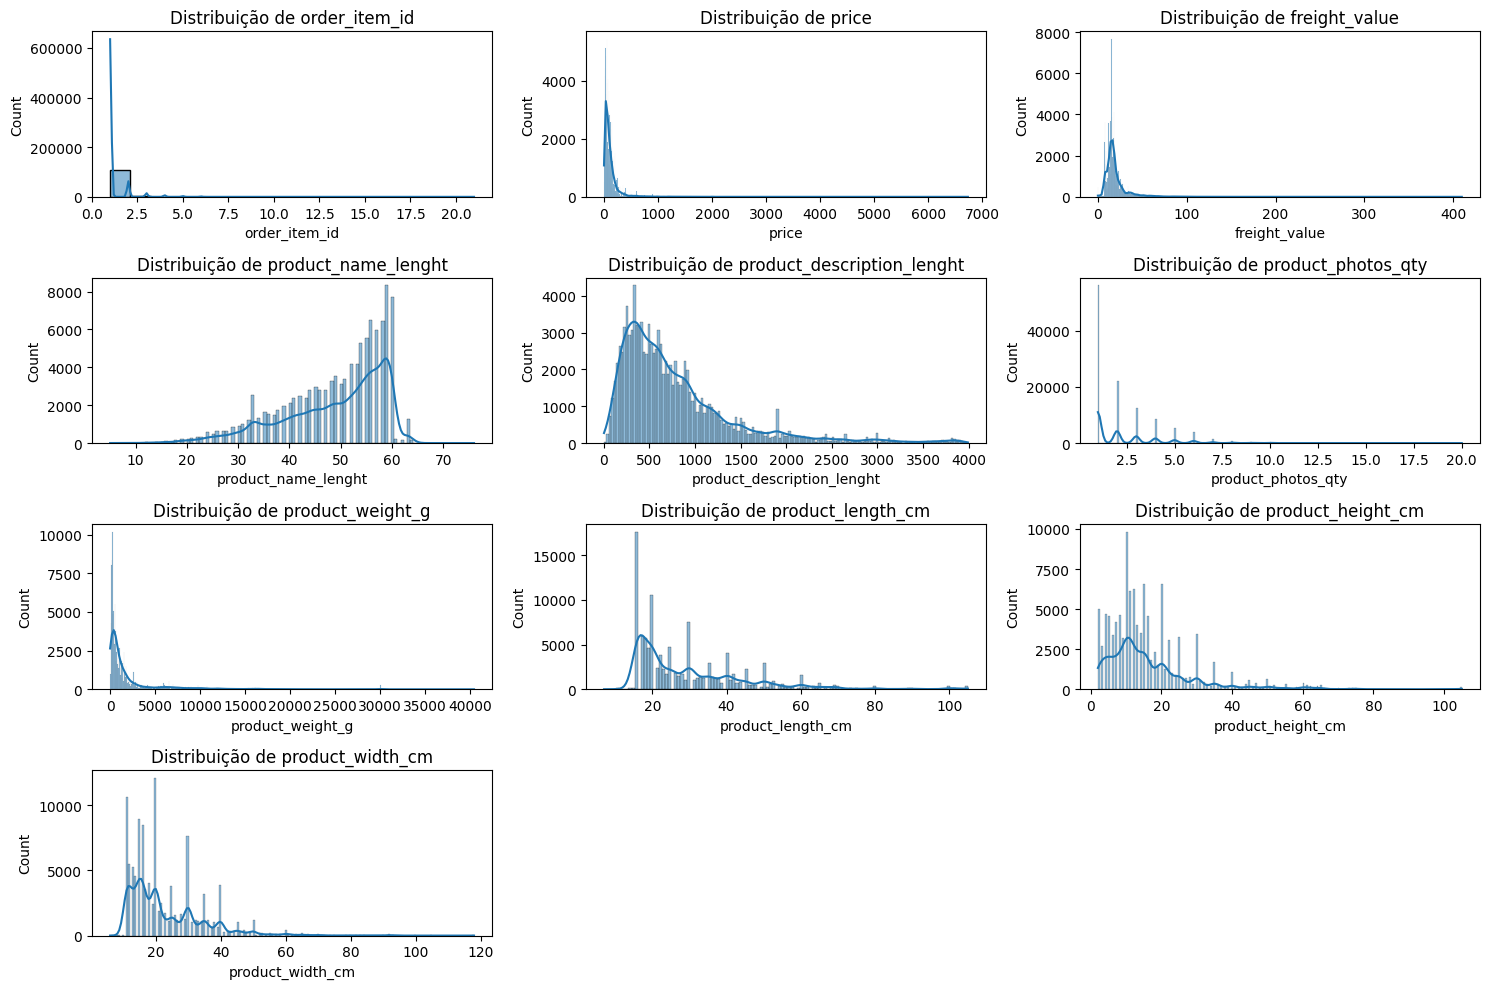

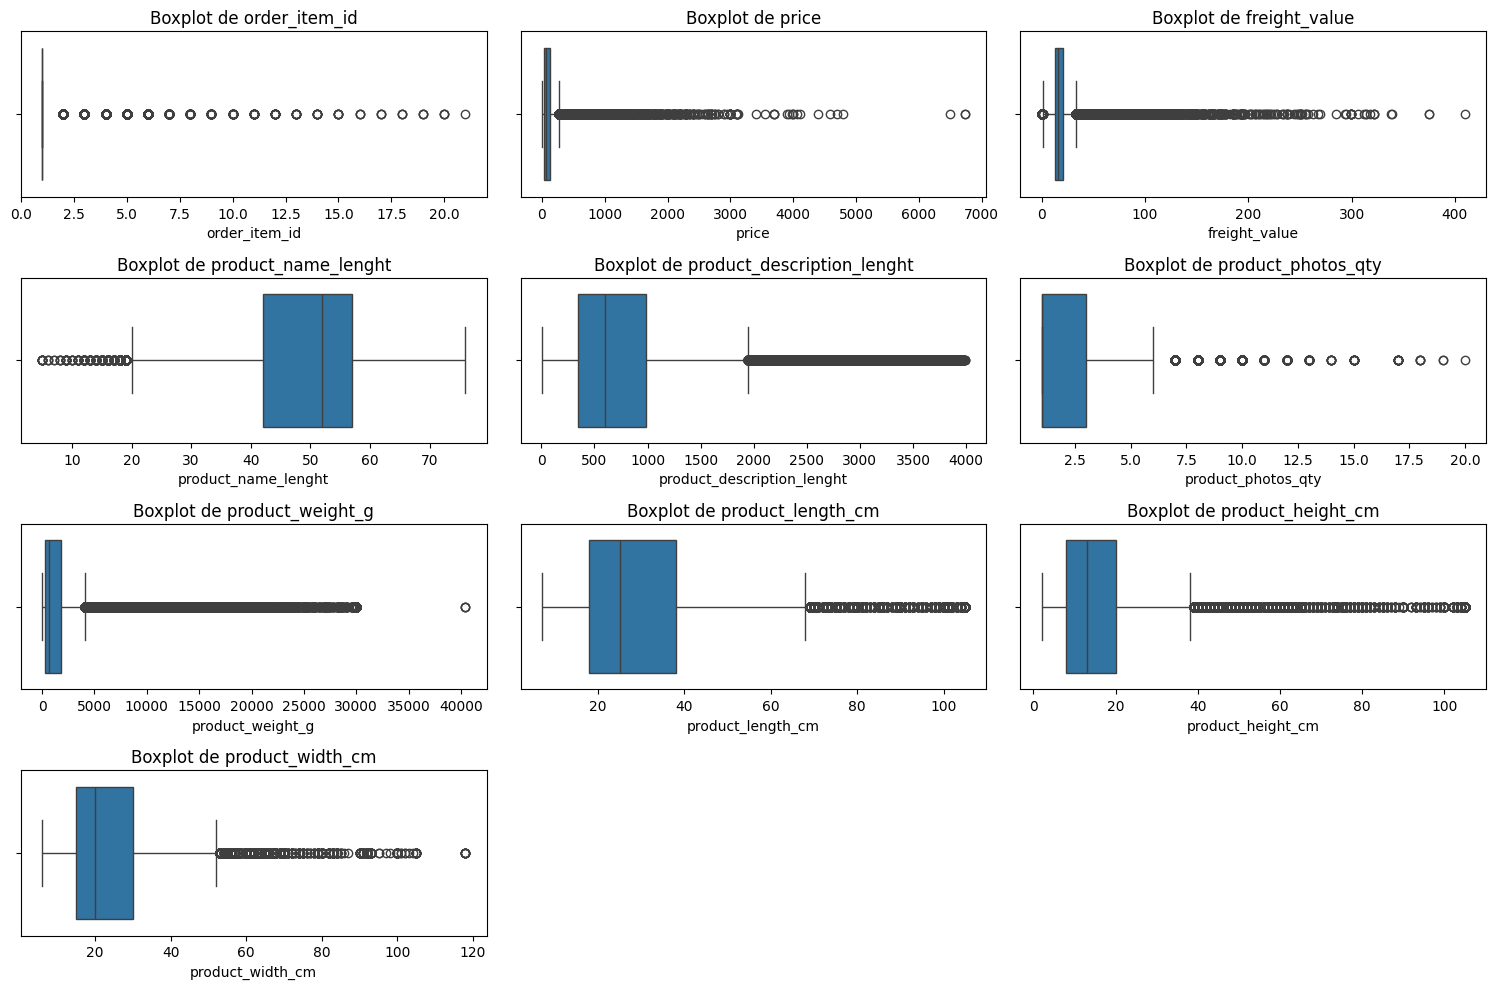


 Valores mais frequentes em 'order_id':


,count
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
ab14fdcfbe524636d65ee38360e22ce8,20
1b15974a0141d54e36626dca3fdc731a,20
9ef13efd6949e4573a18964dd1bbe7f5,15
428a2f660dc84138d969ccd69a0ab6d5,15
73c8ab38f07dc94389065f7eba4f297a,14
9bdc4d4c71aa1de4606060929dee888c,14
37ee401157a3a0b28c9c6d0ed8c3b24b,13
2c2a19b5703863c908512d135aa6accc,12



 Valores mais frequentes em 'customer_id':


,count
customer_id,
fc3d1daec319d62d49bfb5e1f83123e9,21
bd5d39761aa56689a265d95d8d32b8be,20
be1b70680b9f9694d8c70f41fa3dc92b,20
adb32467ecc74b53576d9d13a5a55891,15
10de381f8a8d23fff822753305f71cae,15
d5f2b3f597c7ccafbb5cac0bcc3d6024,14
a7693fba2ff9583c78751f2b66ecab9d,14
7d321bd4e8ba1caf74c4c1aabd9ae524,13
0d93f21f3e8543a9d0d8ece01561f5b2,12



 Valores mais frequentes em 'order_status':


,count
order_status,
delivered,110197
shipped,1185
canceled,542
invoiced,359
processing,357
unavailable,7
approved,3



 Valores mais frequentes em 'order_purchase_timestamp':


,count
order_purchase_timestamp,
2017-07-16 18:19:25,21
2018-02-22 15:30:41,20
2017-08-23 09:22:34,20
2017-01-30 21:44:49,15
2017-11-23 20:30:52,15
2017-12-13 14:21:15,14
2018-02-21 11:45:07,14
2018-04-12 11:02:51,13
2018-04-17 21:08:59,12



 Valores mais frequentes em 'order_approved_at':


,count
order_approved_at,
2018-02-24 03:20:27,23
2017-07-17 18:25:23,21
2017-08-24 14:30:23,20
2017-01-30 22:33:45,15
2017-11-24 10:31:10,15
2017-12-15 02:30:41,15
2018-06-08 19:31:06,15
2018-02-22 11:48:42,14
2018-04-19 22:11:43,13



 Valores mais frequentes em 'order_delivered_carrier_date':


,count
order_delivered_carrier_date,
2018-05-09 15:48:00,48
2018-05-10 18:29:00,36
2018-05-07 12:31:00,21
2017-07-20 15:45:53,21
2018-08-08 15:01:00,21
2017-08-25 20:07:36,20
2018-03-02 00:18:01,20
2018-06-08 14:40:00,19
2018-05-10 14:28:00,18



 Valores mais frequentes em 'order_delivered_customer_date':


,count
order_delivered_customer_date,
2017-07-31 18:03:02,21
2017-09-02 12:13:03,20
2018-03-05 15:22:27,20
2017-12-13 20:19:35,15
2017-02-14 10:48:10,15
2018-03-01 20:47:01,14
2017-12-28 09:05:34,14
2018-04-23 17:47:44,13
2018-05-09 17:48:56,12



 Valores mais frequentes em 'order_estimated_delivery_date':


,count
order_estimated_delivery_date,
2017-12-20 00:00:00,604
2018-05-29 00:00:00,598
2018-03-12 00:00:00,592
2018-03-13 00:00:00,584
2018-07-05 00:00:00,571
2017-12-19 00:00:00,563
2018-05-28 00:00:00,563
2017-12-18 00:00:00,562
2018-02-14 00:00:00,562



 Valores mais frequentes em 'product_id':


,count
product_id,
aca2eb7d00ea1a7b8ebd4e68314663af,527
99a4788cb24856965c36a24e339b6058,488
422879e10f46682990de24d770e7f83d,484
389d119b48cf3043d311335e499d9c6b,392
368c6c730842d78016ad823897a372db,388
53759a2ecddad2bb87a079a1f1519f73,373
d1c427060a0f73f6b889a5c7c61f2ac4,343
53b36df67ebb7c41585e8d54d6772e08,323
154e7e31ebfa092203795c972e5804a6,281



 Valores mais frequentes em 'seller_id':


,count
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
955fee9216a65b617aa5c0531780ce60,1499
1025f0e2d44d7041d6cf58b6550e0bfa,1428
7c67e1448b00f6e969d365cea6b010ab,1364
ea8482cd71df3c1969d7b9473ff13abc,1203



 Valores mais frequentes em 'shipping_limit_date':


,count
shipping_limit_date,
2018-03-01 02:50:48,21
2017-07-21 18:25:23,21
2017-08-30 14:30:23,20
2017-12-21 02:30:41,15
2017-02-03 21:44:49,15
2017-11-30 10:30:51,15
2018-02-28 11:48:12,14
2018-06-13 17:30:35,13
2018-04-25 22:11:43,13



 Valores mais frequentes em 'product_category_name':


,count
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
utilidades_domesticas,6964
relogios_presentes,5991
telefonia,4545
ferramentas_jardim,4347


In [ ]:
# Passo 6: Exploração inical dos dados (EDA)
# Ver as primeiras linhas
print("Primeiras 5 linhas do dataset:")
display(df.head())

# Ver informações gerais (tipos, nulos, memória)
print("\nInformações gerais do dataset:")
df.info()

# Descrição estatística das colunas numéricas
print("\nEstatísticas descritivas:")
display(df.describe())

# Contagem de valores nulos por coluna
print("\nValores ausentes por coluna:")
display(df.isnull().sum())

num_cols = df.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(15, 10)) #Codigo para gerar o histograma para todas
for i, col in enumerate(num_cols): # as colunas numericas do Df
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribuição de {col}")
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(15, 10)) #codigo para identificar os outliers visualmente
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

# Distribuição de categorias mais frequentes
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    print(f"\n Valores mais frequentes em '{col}':")
    display(df[col].value_counts().head(10))


In [9]:
# Passo 7: Fazendo tratamento das duplicadas
#Vendo se existem duplicadas
print("quantidade de duplicadas", df.duplicated().sum())

print("Quantidade de linhas antes de remover duplicadas:", df.shape[0])
df = df.drop_duplicates()
print("Quantidade de linhas depois de remover duplicadas:", df.shape[0])
#Fiz mesmo que não tenha duplicada

quantidade de duplicadas 0
Quantidade de linhas antes de remover duplicadas: 112650
Quantidade de linhas depois de remover duplicadas: 112650


In [11]:
# Passo 8: Fazendo tratamento dos valores nulos


# 1. Visualizando quantos nulos existem por coluna
print("\nValores nulos por coluna:")
display(df.isnull().sum())

# 2. Remoção de nulos das tabelas price e freight_value
df = df.dropna(subset=["price", "freight_value"])

# 3. Preenchimento de nulos categóricos
df["product_category_name"] = df["product_category_name"].fillna("unknown")

# 4. Preenchimento de nulos em datas
date_cols = ["order_delivered_customer_date"]
for col in date_cols:
    df[col] = df[col].fillna(pd.NaT)   # Mantém como data ausente
# Verificação de valores nulos após o tratamento:
print("\nVerificação de valores nulos após o tratamento:")
display(df.isnull().sum())


Valores nulos por coluna:


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1194
order_delivered_customer_date,2454
order_estimated_delivery_date,0
order_item_id,0
product_id,0



Verificação de valores nulos após o tratamento:


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1194
order_delivered_customer_date,2454
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [ ]:
# Passo 9: Fazendo tratamento de inconsistências

#linhas antes do tratamento
linhas_antes = df.shape[0]
print("Linhas antes do tratamento:", linhas_antes)

# 1. Preço negativo
df = df[df["price"] >= 0]

# 2. Frete negativo
df = df[df["freight_value"] >= 0]

# 3. Datas invertidas (entrega antes da compra)
df = df[df["order_delivered_customer_date"] >= df["order_purchase_timestamp"]]

# 4. Remover valores absurdos no frete (ex: frete maior que 10x o preço)
df = df[df["freight_value"] <= (df["price"] * 10)]

linhas_depois = df.shape[0]
print("Linhas depois do tratamento:", linhas_depois)
print("Total removidas:", linhas_antes - linhas_depois)


Linhas antes do tratamento: 112650
Linhas depois do tratamento: 110193
Total removidas: 2457


In [20]:
# Passo 10 — Fazendo conversão e padronização dos tipos
# 1. Identificar colunas de data

date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date"
]

# Converter para datetime
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")


# 2. Converter colunas numéricas
numeric_cols = ["price", "freight_value", "product_weight_g", "product_length_cm",
                "product_height_cm", "product_width_cm", "product_photos_qty"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


# 3. Padronizar textos (minúsculas)

text_cols = ["product_category_name"]

for col in text_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()


# 4. Verificar os tipos após conversão
print("Tipos de dados após padronização:")
print(df.dtypes)


Tipos de dados após padronização:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                    object
product_name_lenght                     float64
product_description_lenght              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
produc

In [12]:
# Passo 11: Fazendo tratamento de outliers


# Colunas numéricas relevantes
num_cols = [
    "price", "freight_value", "product_weight_g",
    "product_length_cm", "product_height_cm", "product_width_cm"
]

# Criar um DF para visualizar antes
print("Tamanho antes da remoção de outliers:", df.shape)

# Função para remover outliers com IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Remover valores fora dos limites
    return data[(data[column] >= lim_inf) & (data[column] <= lim_sup)]

# Aplicar o método IQR em cada coluna numérica
for col in num_cols:
    df = remove_outliers_iqr(df, col)

# Mostrar tamanho depois
print("Tamanho depois da remoção de outliers:", df.shape)


Tamanho antes da remoção de outliers: (112650, 22)
Tamanho depois da remoção de outliers: (77452, 22)


In [21]:
# Passo 12: Criação de novos atributos

# 1. Tempo de processamento (compra até limite de envio)
df["tempo_envio"] = (df["shipping_limit_date"] - df["order_purchase_timestamp"]).dt.days

# 2. Tempo real de entrega (compra até entrega ao cliente)
df["tempo_entrega_real"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# 3. Tempo estimado de entrega (compra até data estimada)
df["tempo_entrega_estimada"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days

# 4. Atraso real (entrega demorou mais que o previsto?)
df["atraso_entrega"] = df["tempo_entrega_real"] > df["tempo_entrega_estimada"]

# 5. Preço total do item (preço + frete)
df["preco_total"] = df["price"] + df["freight_value"]

# 6. Percentual de frete em relação ao preço do produto
df["percentual_frete"] = df["freight_value"] / df["price"]

# 7. Valor do atraso (quantos dias de atraso)
df["dias_atraso"] = df["tempo_entrega_real"] - df["tempo_entrega_estimada"]
df["dias_atraso"] = df["dias_atraso"].apply(lambda x: x if x > 0 else 0)  # negativos viram 0

print("Novas colunas criadas:")
print([col for col in df.columns if col in [
    "tempo_envio", "tempo_entrega_real", "tempo_entrega_estimada",
    "atraso_entrega", "preco_total", "percentual_frete", "dias_atraso"
]])
print(df.info())


Novas colunas criadas:
['tempo_envio', 'tempo_entrega_real', 'tempo_entrega_estimada', 'atraso_entrega', 'preco_total', 'percentual_frete', 'dias_atraso']
<class 'pandas.core.frame.DataFrame'>
Index: 77452 entries, 0 to 112649
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       77452 non-null  object        
 1   customer_id                    77452 non-null  object        
 2   order_status                   77452 non-null  object        
 3   order_purchase_timestamp       77452 non-null  datetime64[ns]
 4   order_approved_at              77441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   76698 non-null  datetime64[ns]
 6   order_delivered_customer_date  75877 non-null  datetime64[ns]
 7   order_estimated_delivery_date  77452 non-null  datetime64[ns]
 8   order_item_id                  77452 non-null  int64         
 9 

In [22]:
# Passo 13: Fazendo normalização e transformação


from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 1. Selecionar colunas numéricas para normalização
num_cols = [
    "price", "freight_value", "product_weight_g",
    "product_length_cm", "product_height_cm", "product_width_cm",
    "tempo_envio", "tempo_entrega_real", "tempo_entrega_estimada",
    "dias_atraso", "percentual_frete", "preco_total"
]

# Criar um dataframe só com as colunas numéricas
df_num = df[num_cols].copy()


# 2. StandardScaler (Normalização Padrão)
# Z-score → média 0, desvio padrão 1

scaler_standard = StandardScaler()
df_standard_scaled = scaler_standard.fit_transform(df_num)

# Transformar em DataFrame
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=[col + "_std" for col in num_cols])


# 3. MinMaxScaler (Escala 0 a 1)
scaler_minmax = MinMaxScaler()
df_minmax_scaled = scaler_minmax.fit_transform(df_num)

df_minmax_scaled = pd.DataFrame(df_minmax_scaled, columns=[col + "_minmax" for col in num_cols])


# 4. Unir ao dataframe original
df_normalizado = pd.concat([df, df_standard_scaled, df_minmax_scaled], axis=1)

print("Normalização concluída!")
print("Novo dataframe contém:", df_normalizado.shape[1], "colunas")


Normalização concluída!
Novo dataframe contém: 53 colunas


In [23]:
# Passo 14: Fazendo codificação de variáveis categóricas
cat_col = "product_category_name"

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=[cat_col], prefix="cat", drop_first=True)

# Mostrar colunas que foram criadas:
novas_colunas_ohe = [col for col in df_encoded.columns if col.startswith('cat_')]

print("--- Colunas One-Hot Encoding Criadas ---")
print(f"Total de colunas criadas: {len(novas_colunas_ohe)}")
print("Primeiras 5 colunas criadas:")
print(novas_colunas_ohe[:5])
print("...")


--- Colunas One-Hot Encoding Criadas ---
Total de colunas criadas: 73
Primeiras 5 colunas criadas:
['cat_alimentos', 'cat_alimentos_bebidas', 'cat_artes', 'cat_artes_e_artesanato', 'cat_artigos_de_festas']
...


In [25]:
# Passo 15: Fazendo seleção de atributos


# Verificar colunas com muitos valores nulos
df.isnull().sum()

print("Shape final:", df.shape)
df.head()


Shape final: (77452, 29)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,tempo_envio,tempo_entrega_real,tempo_entrega_estimada,atraso_entrega,preco_total,percentual_frete,dias_atraso
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,4,8.0,15,False,38.71,0.290764,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,5,13.0,19,False,141.46,0.191744,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,5,9.0,26,False,179.12,0.120200,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,30.0,10.0,20.0,5,13.0,26,False,72.20,0.604444,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,51.0,15.0,15.0,5,2.0,12,False,28.62,0.438191,0.0


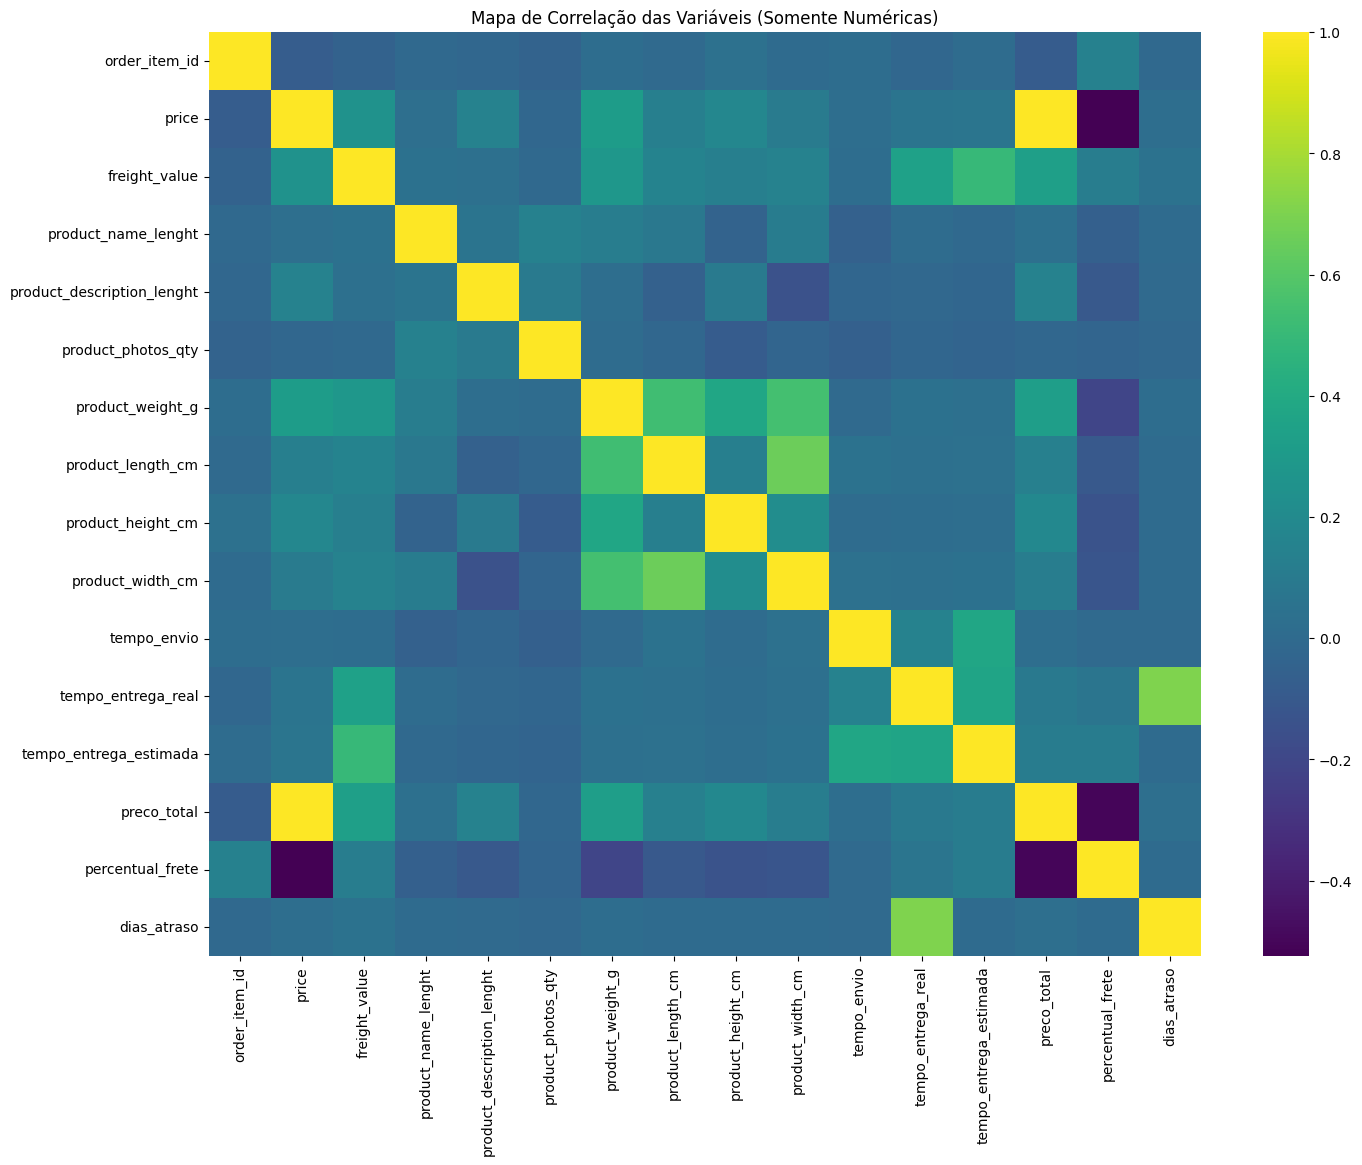

<Figure size 640x480 with 0 Axes>

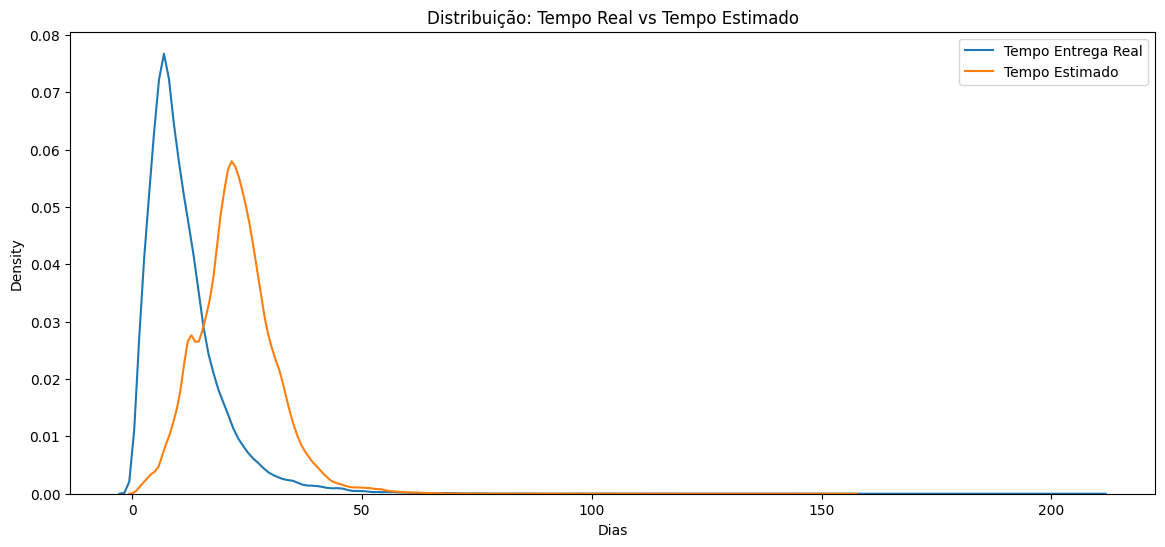

<Figure size 640x480 with 0 Axes>

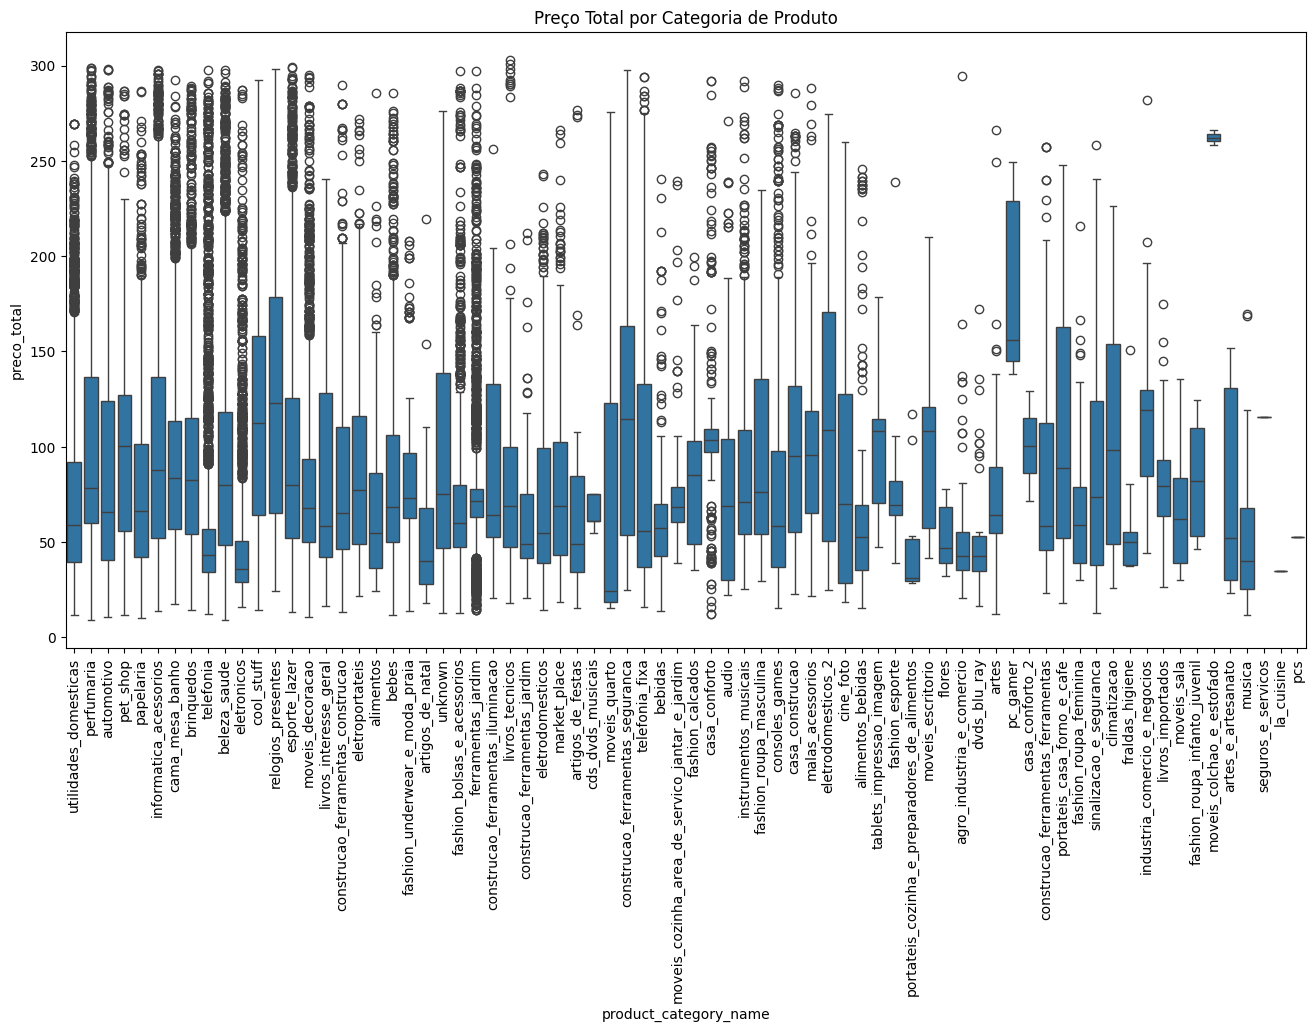

<Figure size 640x480 with 0 Axes>

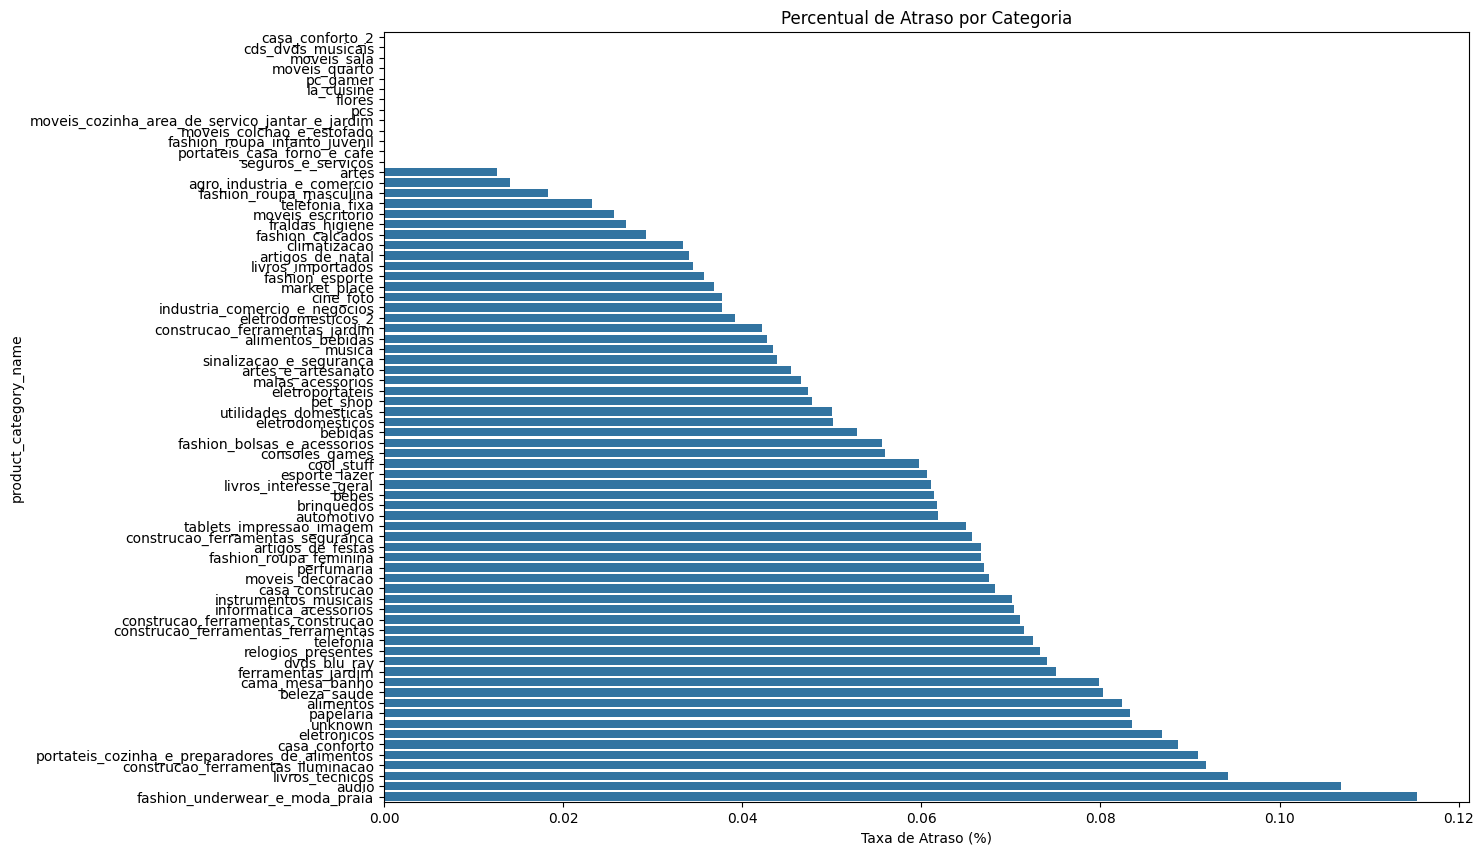

<Figure size 640x480 with 0 Axes>

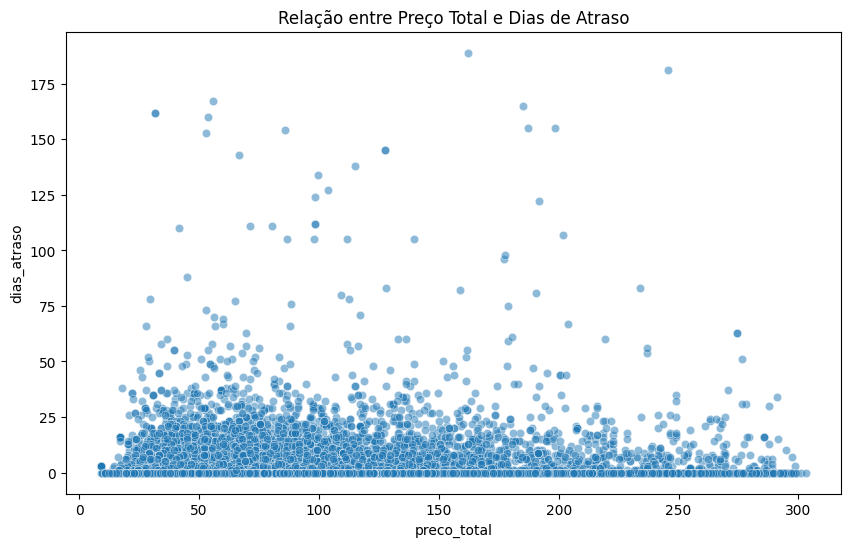

<Figure size 640x480 with 0 Axes>

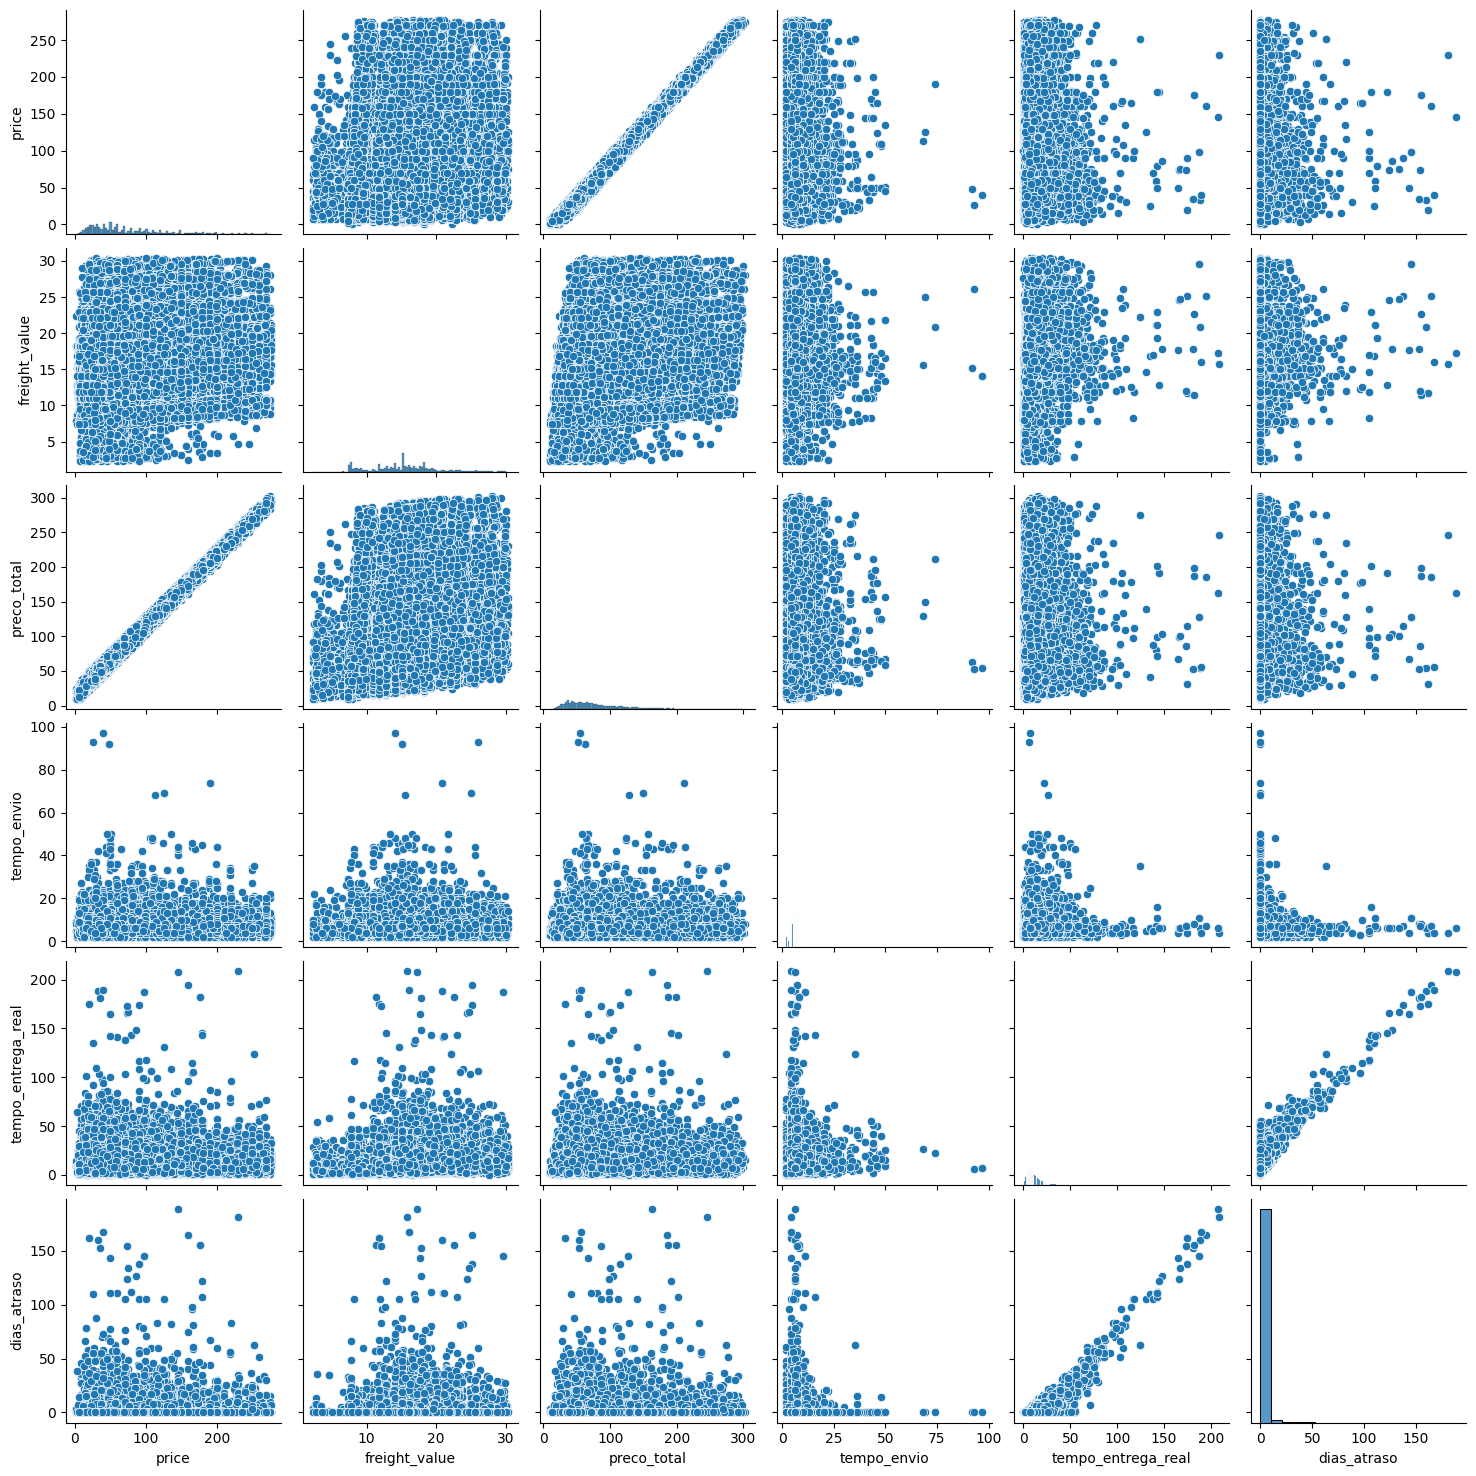

<Figure size 640x480 with 0 Axes>

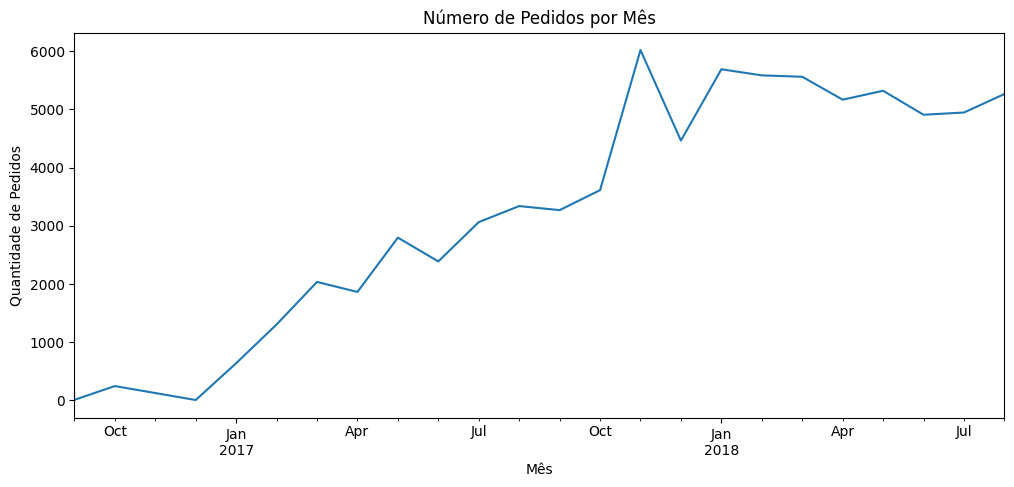

<Figure size 640x480 with 0 Axes>

In [26]:
# Passo 16: Fazendo visualizações avançadas

# HEATMAP DE CORRELAÇÃO
df_numerico = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(16, 12))
sns.heatmap(df_numerico.corr(), annot=False, cmap='viridis')
plt.title("Mapa de Correlação das Variáveis (Somente Numéricas)")
plt.show()
plt.tight_layout()

# Distribuição dos Tempos de Entrega (kdeplot)
plt.figure(figsize=(14, 6))
sns.kdeplot(df["tempo_entrega_real"], label="Tempo Entrega Real")
sns.kdeplot(df["tempo_entrega_estimada"], label="Tempo Estimado")
plt.title("Distribuição: Tempo Real vs Tempo Estimado")
plt.xlabel("Dias")
plt.legend()
plt.show()
plt.tight_layout()

# Boxplot: Preço Total vs Categoria do Produto
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x="product_category_name", y="preco_total")
plt.xticks(rotation=90)
plt.title("Preço Total por Categoria de Produto")
plt.show()
plt.tight_layout()

# Atraso por Categoria (Barplot)
atraso_por_cat = df.groupby("product_category_name")["atraso_entrega"].mean().sort_values()

plt.figure(figsize=(14, 10))
sns.barplot(x=atraso_por_cat.values, y=atraso_por_cat.index)
plt.title("Percentual de Atraso por Categoria")
plt.xlabel("Taxa de Atraso (%)")
plt.show()
plt.tight_layout()

# Relação entre preço total e atraso (scatterplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="preco_total", y="dias_atraso", data=df, alpha=0.5)
plt.title("Relação entre Preço Total e Dias de Atraso")
plt.show()
plt.tight_layout()

# Pairplot: relação entre variáveis importantes
sns.pairplot(df[["price", "freight_value", "preco_total",
                 "tempo_envio", "tempo_entrega_real", "dias_atraso"]])
plt.show()
plt.tight_layout()

# Linha Temporal: Entregas por Mês
df["mes"] = df["order_purchase_timestamp"].dt.to_period("M")
tempo = df.groupby("mes")["order_id"].count()

plt.figure(figsize=(12, 5))
tempo.plot(kind="line")
plt.title("Número de Pedidos por Mês")
plt.xlabel("Mês")
plt.ylabel("Quantidade de Pedidos")
plt.show()
plt.tight_layout()


In [ ]:

# Passo 17: Geração final do dataset

# Visualizar o formato final
print("Shape final do dataset:", df.shape)

# Visualizar amostra
df.head()


Shape final do dataset: (75859, 30)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,tempo_envio,tempo_entrega_real,tempo_entrega_estimada,atraso_entrega,preco_total,percentual_frete,dias_atraso,mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,4,8,15,False,38.71,0.290764,0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,5,13,19,False,141.46,0.191744,0,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,5,9,26,False,179.12,0.120200,0,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,10.0,20.0,5,13,26,False,72.20,0.604444,0,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,15.0,15.0,5,2,12,False,28.62,0.438191,0,2018-02


In [ ]:
# Passo 18: Salvando o DF Final em CSV no Drive
df.to_csv(path + "olist_dataset_unificado.csv", index=False)

print("Arquivo salvo com sucesso em:", path + "olist_dataset_unificado.csv")

Arquivo salvo com sucesso em: /content/drive/MyDrive/Trabalho_CDolist_dataset_unificado.csv
